***Andrew Plum***<br/>
***CS 474***<br/>
***10/5/2024***

## Homework 3: Implement NN from Scratch

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

#### Load the dataset

In [2]:
df=pd.read_csv('winequality-white.csv', sep = ';')
X = df.values[:, :11]
Y = df.values[:, 11]
print('Data shape:', 'X:', X.shape, 'Y:', Y.shape)

# data normalization
min_vals = np.min(X, axis = 0)
max_vals = np.max(X, axis = 0)
X = (X-min_vals)/(max_vals-min_vals) 

# train set and test set preparation
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
y_train =  np.expand_dims(y_train, axis=1)
y_test =  np.expand_dims(y_test, axis=1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

Data shape: X: (4898, 11) Y: (4898,)
(3428, 11) (1470, 11)
(3428, 1) (1470, 1)


#### Task 1: Activation functions. 5 points

1.1 Implement the ReLU function. 

In [3]:
def sigm(z):
    return 1/(1 + np.exp(-z))

def dsigm(z):
    return sigm(z)*(1 - sigm(z))

def softmax(z):
    '''   
        parameter: z: m_batch * n_features
        return: m_batch * n_features
            
    '''
    b = np.exp(z - np.max(z, axis = 1, keepdims = True))# np.max(z)
    return b / np.sum(b, axis = 1, keepdims = True)


def ReLU(z):
    ''' The ReLU function
    
        parameter:
            z: m_batch * n_features
        return: m_batch * n_features
            
    '''
    #-----add your code here----
    
    b = np.where(z > 0, z, 0)
    # Or: 
    #b = np.maximum(z, 0)
    return b
    
    #-------------------------
    
z = np.array([[-1, 2, -3], [4, -2, 4]])
print('softmax output:\n', softmax(z))
print('ReLU output:\n', ReLU(z))

softmax output:
 [[0.04712342 0.94649912 0.00637746]
 [0.49938108 0.00123784 0.49938108]]
ReLU output:
 [[0 2 0]
 [4 0 4]]


#### Task 2: Create the lalyer class. 25 points

    2.1 Implement the Xavier initialization to initilize W and bias. 10 points
    2.2 Complete the run function. 5 points
    2.3 Create layers and process data samples. 10 poits

In [4]:
class Layer:
   
    def __init__(self, units, input_dim, activation = None): 
        #Student can use any method. But cannot initialize W and bias as zeros.

        self.units = units
        self.activation = activation
        self.input_dim = input_dim
        
        np.random.seed(0)
        
        # 2.1 Implement the Xavier initialization to initilize W and bias 
        #check here: https://www.deeplearning.ai/ai-notes/initialization/
        ## add you code here-------------
 
        # https://www.deeplearning.ai/ai-notes/initialization/
        # SAYS Xavier INITIALIZATION WORKS WELL FOR TanH
        # AND He INITIALIZATION WORKS BETTER FOR ReLU
        # WHICH SHOULD BE USED???

        variance = 1.0 / input_dim
        standard_deviation = np.sqrt(variance)
        
        ###CHECK??? I would use standard_deviation for scale because the manual says to do so, right?
        self.W = np.random.normal(loc = 0, scale = standard_deviation, size = (units, input_dim))
        # In np.random.normal() loc should be the mean, scale should be the standard deviation, size should be the shape of the matrix
        ###CHECK???
        #self.bias = np.zeros((units, 1))
        # Bias is initialized to 0 in Xavier initialization and not randomly as below 
        # THE BELOW ONE GIVES CLOSE TO THE EXAMPLE OUTPUT IN THE TEST
        self.bias = np.random.normal(loc=0, scale=1, size=(units, 1))
        
        ##----------------------
        
        self.gW = np.zeros((units, input_dim))
        self.gb = np.zeros((units, 1))
        
    def run(self, inputs):
        ''' calculate the net input and activation output of the current layer
        
            inputs=(n_sample * n_features)
          
            return the activation output
        '''
        #calculate the net input
        
        self.net = np.dot(inputs, self.W.T) + self.bias.T
       
        #2.2 activation output 
        ## add you code here--------

        if self.activation == 'sigmoid':
            self.output = sigm(self.net)
        if self.activation == 'softmax':
            self.output = softmax(self.net)
        if self.activation == 'relu':
            self.output = ReLU(self.net)
        if self.activation == None: #linear layer
            self.output = self.net 
        
        ##------------------------------     
        return self.output

In [5]:
## 2.3 create a liner and non-linear layers with 2 nodes/units, input the first two training samples, and print the output

#add your code here----------------------
# create a linear layer with 2 nodes/units and print out for processing the first two samples

###CHECK??? 
# MY BIAS NODES ARE INTIALIZED TO 0 AS PER XAVIER INITIALIZATION BUT IT ISN"T IN THE EXAMPLE OUTPUT 
# THE EXAMPLE OUTPUT HAS RANDOM NORMAL BIASES WITH A STD_DEV OF 1 
# I HAVE 2 UNITS INSTEAD OF THE 1 GIVEN IN EXAMPLE OUTPUT

linear_layer = Layer(units = 1, input_dim = X.shape[1], activation = None)

print("Linear Layer:")
print("Weights:", linear_layer.W)
print("Bias:", linear_layer.bias)
linear_layer_output = linear_layer.run(X[0:2,:])
print("Output:", linear_layer_output)

# create a non-linear layers with 2 nodes/units and the sigmoid activation and print out for processing the first two samples

print()

nonlinear_layer = Layer(units = 1, input_dim = X.shape[1], activation = "sigmoid")

print("Nonlinear Sigmoid Layer:")
print("Weights:", nonlinear_layer.W)
print("Bias:", nonlinear_layer.bias)
nonlinear_layer_output = nonlinear_layer.run(X[0:2,:])
print("Output:", nonlinear_layer_output)

#----------------------------------

Linear Layer:
Weights: [[ 0.53188179  0.12065194  0.29510061  0.67565472  0.56308992 -0.29466037
   0.28646244 -0.04563592 -0.03112165  0.12380011  0.04343077]]
Bias: [[1.45427351]]
Output: [[2.05427702]
 [1.84212794]]

Nonlinear Sigmoid Layer:
Weights: [[ 0.53188179  0.12065194  0.29510061  0.67565472  0.56308992 -0.29466037
   0.28646244 -0.04563592 -0.03112165  0.12380011  0.04343077]]
Bias: [[1.45427351]]
Output: [[0.88637908]
 [0.86320018]]


#### Task 3: Create NN. 50 points

    3.1 Implement the loss function. 5 points
    3.2 Complete the following 'train' function. 10 points
    3.3 Implement the BP algorithm. CS 474 students will earn 10 extra points for processing more than three layers. It is required for CS574 students to implement BP for processing more than 3 layers. 30 points
    3.4 update all weights and bias. 5 points 

In [6]:
class NeuralNetwork:
    
    def __init__(self):
        self.layers=[] #list of layers
        
    def add(self, units, input_dim, activation = None):
        '''add layers to NN
            
            units: the number of nodes
            input_dims: input dimensions
            activation: activation fundtions
        
        '''
        layer = Layer(units, input_dim, activation)
        self.layers.append(layer)
    
    def forward_prop(self, inputs):
        '''forward propagation calculates net input and output for each layer
        
            inputs: input data(n_samples * n_features)
            return the output of the last layer: n_samples * n_output_nodes
            
        '''
        
        nLayers = len(self.layers)
        #print(nLayers)
        for i in range(nLayers):
            out = self.layers[i].run(inputs)
            inputs = out   
        return out
    
    # 3.1 implement the loss function. 5 points
    def loss(self, y_pred, y):
        '''loss function: 1/(2*n_samples)*sum_samples((y_i-y_pred_i)**2)
            y_pred: predictions(n_samples * 1)
            y: target(n_samples * 1)
        '''
        #add your code here-------------------

        num_samples = X.shape[0]
        loss = 1 / (2 * num_samples) * np.sum((y - y_pred)**2)
        
        return loss
        
        #------------------------------------
    
    # implement the prediction function.
    def predict(self, x):
        '''predict
            x: input(n_samples * n_features) 
            return predicted values
        '''
        out = self.forward_prop(x)
        return out
         

    #3.2 complete the following 'train' function. 10 points
    def train(self, inputs, targets, lr = 0.001, batch_size = 32, epochs = 50):
        '''implement the SGD process and use Back-Propagation algorithm to calculate gradients 
        
            inputs: training samples
            targets: training targets
            lr: learning rate
            batch_size: batch size
            epochs: max number of epochs
        '''
        
        m = len(targets)  
        loss_hist = np.zeros(epochs)
        
        for i in range(epochs):
            #shuffle the data
            idx = np.arange(m)
            np.random.shuffle(idx)
            inputs = inputs[idx]
            targets = targets[idx]
            
            for b in range(int(m/batch_size)):
                b_start= b*batch_size
                b_end = min((b+1)*batch_size, m)
                
                x_batch = inputs[b_start:b_end, :]
                y_batch = targets[b_start:b_end, :]
                #print(x_batch.shape)
                
                #add your code here------------------------------
                # 1)run forward propagation to get output of the current mini-batch

                minibatch_output = self.forward_prop(x_batch)
                
                # 2)call BP to calculate all gradients

                self.BP(x_batch, y_batch)
                
                # 3)update all weights and bias

                self.updateWeights(lr)
                
                #-------------------------------------------------
                
            lr = lr*0.99  
            #add your code here---------------------------
            # 4) calculate and record the loss of current epoch

            y_pred = self.predict(inputs)
            epoch_loss = self.loss(y_pred, targets)
            loss_hist[i] = epoch_loss
            
            # 5) print out the loss of current epoch

            print(f"Loss of epoch {i + 1}: ", epoch_loss)
            
            #-----------------------------------------
        return loss_hist
   
    #3.3 implement the BP algorithm. 30 points
    def BP(self, x, y):
        ''' Back-propagation algorithm
        
            x: input samples (n_samples * n_features)
            y: predicted values
        '''
        
        nLayers = len(self.layers)
        m_batch = x.shape[0]
        
        #add your code here------------------------------------
        # CS474 students are required to perform BP for three layers
        # CS 574 students are required to perform BP for more than three layers

        deltas = [None] * nLayers
        
        # calculate the deltas
        for i in reversed(range(nLayers)):
            current_layer = self.layers[i]
            if i == nLayers - 1: # then current_layer is the output layer
                deltas[i] = (current_layer.output - y) * (self.get_activation_derivative(current_layer.output, current_layer.activation))
            else: # not an output layer
                next_layer = self.layers[i + 1]
                
                deltas[i] = (np.dot(deltas[i + 1], next_layer.W) * self.get_activation_derivative(current_layer.output, current_layer.activation))

                """
                print(f"Current layer {i} delta shape: {deltas[i].shape}")
                print(f"Next layer delta shape: {deltas[i + 1].shape}")
                print(f"Next layer W shape: {next_layer.W.shape}")
                print(f"Next layer W.T shape: {next_layer.W.T.shape}")
                """

        # calculate the gradients
            if i == 0: 
                current_layer.gW = np.dot(deltas[i].T, x) / m_batch
            else:
                current_layer.gW = np.dot(deltas[i].T, self.layers[i - 1].output) / m_batch
            current_layer.gb = np.mean(deltas[i], axis = 0, keepdims = True).T
            
        #------------------------------------------------------------
        
    #3.4 update all weights and bias. 5 points         
    def updateWeights(self, lr):
        nLayers = len(self.layers)
        #add your code here------------------------------------------------------

        for layer in self.layers:
            layer.W -= lr * layer.gW
            layer.bias -= lr * layer.gb
        
        #------------------------------------------------------------------------   
        
    def get_activation_derivative(self, output, activation):
        if activation == 'sigmoid':
            derivative = output * (1 - output)
            return output * (1 - output)
        elif activation == 'softmax':
            v = output.reshape(-1, 1)
            derivative = np.diagflat(v) - np.dot(v, v.T)
            return derivative
        elif activation == 'relu':
            derivative = (output > 0).astype(float)
            return derivative
        else:  # linear
            derivative = np.ones_like(output)
            return derivative

#### Task 4: Evaluation. 20 points

    4.1 Create a three-layer NN: The hidden layer has 10 units with sigmoid activation, and the output layer has one unit with None activation.
    4.2 Train the network by calling the train function using the training set: lr = 0.001, batch_size = 8, epochs = 50
    4.3 Plot the loss_hist from the training results
    4.4 Evaluate the trained nn by calcualating the MSE and MAE using using both the training and test sets

##### 4.1 and 4.2 create and train the nn. 5 points

In [11]:
#add your code here--

three_layer_NN = NeuralNetwork()
#Params: NeuralNetwork.add(units, input_dims, activation = None)
three_layer_NN.add(10, X.shape[1], "sigmoid") # hidden layer
three_layer_NN.add(1, 10) # output layer

three_layer_NN_loss = three_layer_NN.train(X_train, y_train, lr = 0.001, batch_size = 8, epochs = 50)

#------------------

Loss of epoch 1:  0.3068035895697944
Loss of epoch 2:  0.26875339785710173
Loss of epoch 3:  0.2681560571609813
Loss of epoch 4:  0.2677904052343714
Loss of epoch 5:  0.26751859554715846
Loss of epoch 6:  0.2671102832596079
Loss of epoch 7:  0.2667727467978998
Loss of epoch 8:  0.2664236124490415
Loss of epoch 9:  0.2661256499501618
Loss of epoch 10:  0.26577191574718995
Loss of epoch 11:  0.2654770090729172
Loss of epoch 12:  0.26513526746996247
Loss of epoch 13:  0.2648270832272052
Loss of epoch 14:  0.2645240975734617
Loss of epoch 15:  0.26423490026036395
Loss of epoch 16:  0.2639386441394707
Loss of epoch 17:  0.2636554977885043
Loss of epoch 18:  0.2633593621797284
Loss of epoch 19:  0.26311058998679704
Loss of epoch 20:  0.2628228067095025
Loss of epoch 21:  0.26253444728179487
Loss of epoch 22:  0.2622755455945548
Loss of epoch 23:  0.26203301369712745
Loss of epoch 24:  0.2617733438537898
Loss of epoch 25:  0.2614812609750535
Loss of epoch 26:  0.2612356838098042
Loss of epoch

##### 4.3 Plot the loss_hist. 5 points

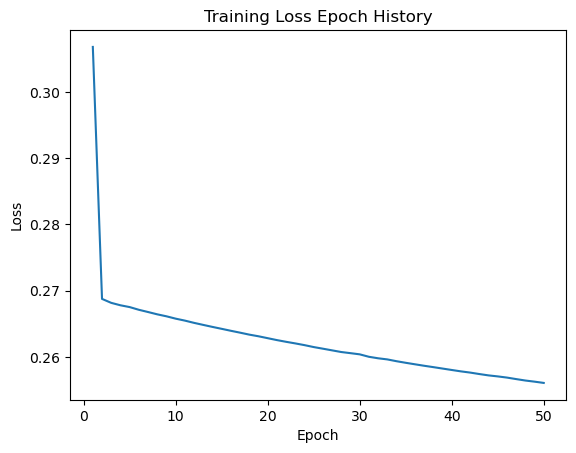

In [12]:
#add your code here--

plt.figure()
plt.plot(range(1, len(three_layer_NN_loss) + 1), three_layer_NN_loss)
plt.title('Training Loss Epoch History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#------------------

##### 4.4 Evaluate the trained nn by calcualating the MSE and MAE using using both the training and test sets. 10 points

In [9]:
#add your code here--

from sklearn.metrics import mean_squared_error, mean_absolute_error

def myMSE(y_true, y_pred):
    
    MSE = np.mean((y_true - y_pred)**2)
    
    return MSE
    
def myMAE(y_true, y_pred):
    
    MAE = np.mean(np.abs(y_true - y_pred))
    
    return MAE

def print_metrics(X_train, X_test, y_train, y_test, Neural_Network):

    y_pred_train = Neural_Network.predict(X_train)

    my_mse_train = myMSE(y_train, y_pred_train)
    my_mae_train = myMAE(y_train, y_pred_train)
    print("My training scores:")
    print('training mse: {} and training mae:{}'.format(my_mse_train, my_mae_train))

    mse_train = mean_squared_error(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    print("Sklearn training scores:")
    print('training mse: {} and training mae:{}'.format(mse_train, mae_train))

    print()

    y_pred_test = Neural_Network.predict(X_test)

    my_mse_test = myMSE(y_test, y_pred_test)
    my_mae_test = myMAE(y_test, y_pred_test)
    print("My testing scores:")
    print('test mse: {} and test mae:{}'.format(my_mse_test, my_mae_test))

    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    print("Sklearn testing scores:")
    print('test mse: {} and test mae:{}'.format(mse_test, mae_test))

print_metrics(X_train, X_test, y_train, y_test, three_layer_NN)
    
#------------------

My training scores:
training mse: 0.7317457183064701 and training mae:0.6340462440313365
Sklearn training scores:
training mse: 0.7317457183064701 and training mae:0.6340462440313365

My testing scores:
test mse: 0.7728589539503203 and test mae:0.662670692450351
Sklearn testing scores:
test mse: 0.7728589539503203 and test mae:0.662670692450351


#### Task 5(Optional): Students get 10 extra points for getting better test performance using 
    1)different hyperparameters(batch size, lr, and epochs) and/or 
    2)nn design, e.g., different number of hidden nodes, different number of hidden layers, different activation functions

Loss of epoch 1:  0.26975920878156634
Loss of epoch 2:  0.2689145945912859
Loss of epoch 3:  0.268044119068519
Loss of epoch 4:  0.26730083001331345
Loss of epoch 5:  0.268956686439718
Loss of epoch 6:  0.26507847551566355
Loss of epoch 7:  0.26435539471770586
Loss of epoch 8:  0.26495270459540804
Loss of epoch 9:  0.26110082758729314
Loss of epoch 10:  0.2606234557630932
Loss of epoch 11:  0.25763342640488
Loss of epoch 12:  0.2553332494041981
Loss of epoch 13:  0.25287159650369573
Loss of epoch 14:  0.2513024221068087
Loss of epoch 15:  0.24731847707647364
Loss of epoch 16:  0.24444727090123922
Loss of epoch 17:  0.23997163473226282
Loss of epoch 18:  0.23710984192098508
Loss of epoch 19:  0.23215741743680063
Loss of epoch 20:  0.22853674756996797
Loss of epoch 21:  0.22474279828868218
Loss of epoch 22:  0.22122450824612128
Loss of epoch 23:  0.2182366591917459
Loss of epoch 24:  0.21591108625216476
Loss of epoch 25:  0.21677697306214322
Loss of epoch 26:  0.21226291984068102
Loss of

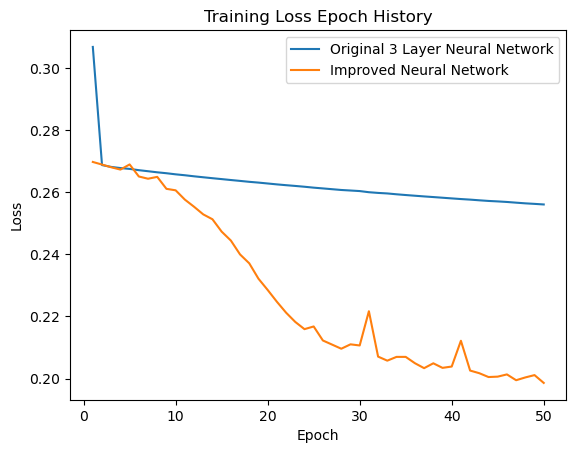

Metrics of the original 3 layer neural network:

My training scores:
training mse: 0.7317457183064701 and training mae:0.6340462440313365
Sklearn training scores:
training mse: 0.7317457183064701 and training mae:0.6340462440313365

My testing scores:
test mse: 0.7728589539503203 and test mae:0.662670692450351
Sklearn testing scores:
test mse: 0.7728589539503203 and test mae:0.662670692450351



Metrics of the improved neural network:

My training scores:
training mse: 0.567514281702084 and training mae:0.5879611290407698
Sklearn training scores:
training mse: 0.567514281702084 and training mae:0.5879611290407698

My testing scores:
test mse: 0.6155909096979516 and test mae:0.6184707397154372
Sklearn testing scores:
test mse: 0.6155909096979516 and test mae:0.6184707397154372


In [17]:
#add your code here--

# train

improved_NN = NeuralNetwork()

#Params: NeuralNetwork.add(units, input_dims, activation = None)
improved_NN.add(32, X.shape[1], "sigmoid") # hidden layer
improved_NN.add(16, 32, "sigmoid")  # hidden layer

improved_NN.add(1, 16) # output layer

improved_NN_loss = improved_NN.train(X_train, y_train, lr = 0.01, batch_size = 4, epochs = 50)

# plot loss histories of both neural networks

plt.figure()
plt.plot(range(1, len(three_layer_NN_loss) + 1), three_layer_NN_loss, label = "Original 3 Layer Neural Network")
plt.plot(range(1, len(improved_NN_loss) + 1), improved_NN_loss, label = "Improved Neural Network")
plt.title('Training Loss Epoch History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# print metrics

print("Metrics of the original 3 layer neural network:\n")
print_metrics(X_train, X_test, y_train, y_test, three_layer_NN)

print("\n\n")

print("Metrics of the improved neural network:\n")
print_metrics(X_train, X_test, y_train, y_test, improved_NN)

#------------------